# <center>EPIB 613 INTRODUCTION TO STATISTICAL SOFTWARE</center>

<center> McGill EBOH </center>

<center> Fall 2020 </center>

<center> Yi Lian </center>

# Lecture 6
- Control structure
- Missing value
- Useful functions

## 6.1 Control structure

<b>Loops</b> and <b>if-else conditions</b> are very important structures in most programming languages.

See ?Control

R is more efficient with vectorized operations but not loops. I taught a workshop on efficient coding and computing and explaied why. Here is the link: https://github.com/ly129/MiCM2020

### 6.1.1 For loop

#### When we know how many iterations we want to perform.

In [1]:
for (names in c("Lucy", "John", "Mark", "Candy")) {
    print(names)
}

[1] "Lucy"
[1] "John"
[1] "Mark"
[1] "Candy"


In [2]:
x <- 11:15
n <- length(x)

for (index in 1:length(x)) {
    x[index] <- 2 * x[index]
}
x

[1] 22 24 26 28 30

In [3]:
# Vectorized operation?
x <- 11:15
x <- x * 2; x

[1] 22 24 26 28 30

In [4]:
df <- data.frame(names = c("Lucy", "John", "Mark", "Candy"),
                 score = c(67, 56, 87, 91))
df$names <- as.character(df$names)
df

names,score
<chr>,<dbl>
Lucy,67
John,56
Mark,87
Candy,91


In [5]:
for (i in 1:4) {
    df$curved[i] <- round(sqrt(df$score[i])*10)
}
df

names,score,curved
<chr>,<dbl>,<dbl>
Lucy,67,82
John,56,75
Mark,87,93
Candy,91,95


### 6.1.2 While loop

#### When we know when we want to stop.

In [6]:
x <- 1
y <- 5

iteration <- 0

while (x < y) {
    x <- x + 1
    iteration <- iteration + 1
    cat("iteration ", iteration, ", x = ", x, "\n", sep = "")
}

x

iteration 1, x = 2
iteration 2, x = 3
iteration 3, x = 4
iteration 4, x = 5


[1] 5

In [7]:
# Vectorized operation?

# Sometimes loops are necessary.

Two useless operators in R that I found useful for teaching: modulus and integer division.

$$ \text{integer } 9/2 \rightarrow 9 = \underbrace{4}_{\text{integer division}} \times 2 + \underbrace{1}_\text{modulus}$$

In [8]:
9 %% 2   # 9 mod 2

[1] 1

In [9]:
9 %/% 2

[1] 4

##### Exercise: can we write a while loop to do the two operations at the same time?

In [10]:
# y %% x
# y %/% x

y <- 9
x <- 2
counter <- 0

while (y >= x) {
    y <- y - x
    counter <- counter + 1
}

integer.div <- counter
modulus <- y

integer.div
modulus

[1] 4

[1] 1

### 6.1.3 If, else, ifelse

Not a loop. <tt>ifelse</tt> is the vectorized alternative to <tt>if ..., else, ...</tt>.

##### Programmers' logic 
    -- "Honey, on your way home, buy 6 oranges at the supermarket. If they have watermelons, get 1."

    -- Mr. Programmer came home with 1 orange.

    -- Furious girlfriend, "Why the [--beep--] did you get only 1 orange?"

    -- "Because they have watermelons."

In [11]:
# Girlfriend
watermelon <- T
gf.orange <- 6

gf.watermelon <- if (watermelon == TRUE) {
    "Buy 1 watermelon"
}

gf.watermelon

[1] "Buy 1 watermelon"

In [12]:
# Mr. Programmer
watermelon <- F

pro.orange <- if (watermelon == TRUE) {
    "Buy 1 orange"
} else {
    "Buy 6 oranges"   # As seen in class, print() is useless here.
}
pro.orange

# pro.watermelon <- ???

[1] "Buy 6 oranges"

In [13]:
# I prefer a simple function, ifelse(test, yes, no)

watermelon <- F
ifelse(watermelon == TRUE, yes = "Buy 1 orange", no = "Buy 6 oranges")

[1] "Buy 6 oranges"

In [14]:
# ifelse is vectorized
df$pass <- ifelse(test = df$score >= 65, yes = TRUE, no = FALSE)
df

names,score,curved,pass
<chr>,<dbl>,<dbl>,<lgl>
Lucy,67,82,TRUE
John,56,75,FALSE
Mark,87,93,TRUE
Candy,91,95,TRUE


In [15]:
# vectorized operation
df$pass2 <- df$score>=65;df

names,score,curved,pass,pass2
<chr>,<dbl>,<dbl>,<lgl>,<lgl>
Lucy,67,82,TRUE,TRUE
John,56,75,FALSE,FALSE
Mark,87,93,TRUE,TRUE
Candy,91,95,TRUE,TRUE


### 6.1.4 Repeat loop
#### Repeat until told to stop (or not)

In [16]:
# Mr. Pro explains why he comes home with one orange for 3 times.

i <- 0
repeat {
    i <- i + 1
    cat("Because they have watermelons!  X", i, "\n")
    
    if (i>=3){
        break
    }
}

Because they have watermelons!  X 1 
Because they have watermelons!  X 2 
Because they have watermelons!  X 3 


###### Exercise: use the repeat loop to calculate 9 %% 2 and 9 %/% 2.

## 6.2 Missing values
- NA

In [17]:
df.copy <- df
df.copy$score[2] <- df.copy$names[3] <- NA
df.copy

names,score,curved,pass,pass2
<chr>,<dbl>,<dbl>,<lgl>,<lgl>
Lucy,67,82,TRUE,TRUE
John,NA,75,FALSE,FALSE
NA,87,93,TRUE,TRUE
Candy,91,95,TRUE,TRUE


In [18]:
is.na(df.copy)

names,score,curved,pass,pass2
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE


In [19]:
# Total number of cells with missing values
sum(is.na(df.copy))

[1] 2

In [20]:
# Whether a data point (row) is complete
complete.cases(df.copy)

[1]  TRUE FALSE FALSE  TRUE

In [21]:
!complete.cases(df.copy)

[1] FALSE  TRUE  TRUE FALSE

In [22]:
# Complete data points
df.copy[complete.cases(df.copy), ]

,names,score,curved,pass,pass2
,<chr>,<dbl>,<dbl>,<lgl>,<lgl>
1,Lucy,67,82,TRUE,TRUE
4,Candy,91,95,TRUE,TRUE


In [23]:
# Taking the average score
mean(df.copy$score)

[1] NA

In [24]:
mean(df.copy$score, na.rm = TRUE)

[1] 81.66667

In [25]:
sum(df.copy$score)
sum(df.copy$score, na.rm = T)

[1] NA

[1] 245

In [26]:
na.omit(df.copy)

,names,score,curved,pass,pass2
,<chr>,<dbl>,<dbl>,<lgl>,<lgl>
1,Lucy,67,82,TRUE,TRUE
4,Candy,91,95,TRUE,TRUE


In [27]:
# Options in R that deals with missingness
# ?na.action

## 6.3 Useful functions
### 6.3.1 Numeric

In [28]:
# Absolute value
abs(-3)

[1] 3

In [29]:
ceiling(3.14159); ceiling(-3.14159)

[1] 4

[1] -3

In [30]:
floor(3.14159); floor(-3.14159)

[1] 3

[1] -4

In [31]:
trunc(3.14159); trunc(-3.14159)

[1] 3

[1] -3

In [32]:
signif(3.14159, 3)

[1] 3.14

In [33]:
round(pi, digits = 10)

[1] 3.141593

##### Exercise: use these functions to calculate 9 %% 2 and 9 %/% 2.

In [34]:
floor(9/2)

[1] 4

In [35]:
age <- c(1,6,4,5,8,5,4,3)
age

[1] 1 6 4 5 8 5 4 3

In [36]:
sum(age)

[1] 36

In [37]:
mean(age)

[1] 4.5

In [38]:
prod(age)

[1] 57600

In [39]:
median(age)

[1] 4.5

In [40]:
var(age)
sd(age)

[1] 4.285714

[1] 2.070197

In [41]:
max(age)
min(age)
range(age)

[1] 8

[1] 1

[1] 1 8

In [42]:
age

[1] 1 6 4 5 8 5 4 3

In [43]:
which.max(age)   #returns the index of the greatest element of x
which.min(age)   #returns the index of the smallest element of x

[1] 5

[1] 1

In [44]:
seq(from = 0, to = 1, by = 0.25)
quantile(1:100, probs = seq(from = 0, to = 1, by = 0.25))
# Returns the specified quantiles.

[1] 0.00 0.25 0.50 0.75 1.00

0%    25%    50%    75%   100% 
  1.00  25.75  50.50  75.25 100.00

In [45]:
age
unique(age)   # Gives the vector of distinct values

[1] 1 6 4 5 8 5 4 3

[1] 1 6 4 5 8 3

In [46]:
diff(age)   # Replaces a vector by the vector of first differences

[1]  5 -2  1  3 -3 -1 -1

In [47]:
sort(age, decreasing = T)   # Sorts elements into order

[1] 8 6 5 5 4 4 3 1

In [48]:
order(age)
age[order(age)]   # x[order(x)] orders elements of x

[1] 1 8 3 7 4 6 2 5

[1] 1 3 4 4 5 5 6 8

In [49]:
age
cumsum(age)    # Cumulative sums
cumprod(age)   # Cumulative products

[1] 1 6 4 5 8 5 4 3

[1]  1  7 11 16 24 29 33 36

[1]     1     6    24   120   960  4800 19200 57600

### 6.3.2 Character

- paste( ) and expression( )
    - paste( ) put text and variable values together into a text string.
    - expression( ) can be used to display math symbols when needed, e.g. in plot titles.
- grep( ) and related
    - Deal with text patterns

##### Few situations where you have to deal with text in R
- Data frame entries
- Plot title, labels, legends, etc...
- Text mining 

#### paste( ) and expression( )

In [50]:
df$pass2 <- NULL
df$student.no <- NULL
df

names,score,curved,pass
<chr>,<dbl>,<dbl>,<lgl>
Lucy,67,82,TRUE
John,56,75,FALSE
Mark,87,93,TRUE
Candy,91,95,TRUE


In [51]:
for (i in 1:4){
    df$student.no[i] <- paste("student", i)
}
df

names,score,curved,pass,student.no
<chr>,<dbl>,<dbl>,<lgl>,<chr>
Lucy,67,82,TRUE,student 1
John,56,75,FALSE,student 2
Mark,87,93,TRUE,student 3
Candy,91,95,TRUE,student 4


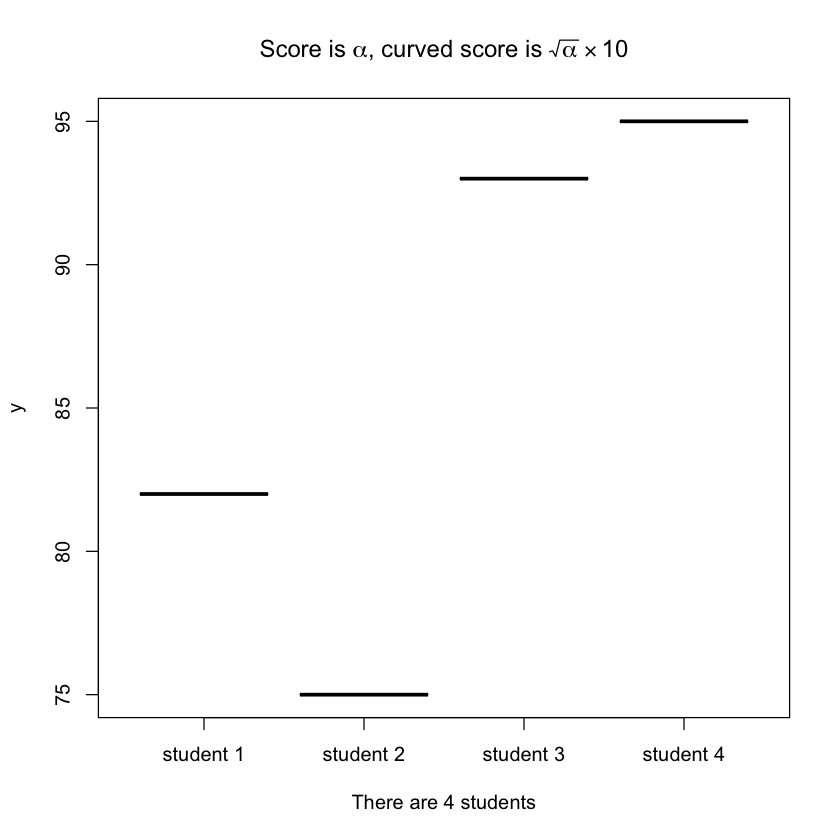

In [52]:
n <- nrow(df)
plot(as.factor(df$student.no), df$curved,
     # Math symbols in text
     main = expression(paste("Score is ", alpha, ", curved score is ", sqrt(alpha)%*%10)),
     # Variable value in text
     xlab = paste("There are", n, "students"))

#### grep( ) and many related

In [53]:
find <- "epib"
courses.EBOH <- c("epib601", "epib602", "bios601", "bios602", "math556", "math557")

In [54]:
grep(pattern = find, x = courses.EBOH, value = T)

[1] "epib601" "epib602"

In [55]:
grep(pattern = find, x = courses.EBOH, value = F)

[1] 1 2

In [56]:
grepl(pattern = find, x = courses.EBOH)

[1]  TRUE  TRUE FALSE FALSE FALSE FALSE

In [57]:
gsub(pattern = find, replacement = "EPIB", x = courses.EBOH)

[1] "EPIB601" "EPIB602" "bios601" "bios602" "math556" "math557"

In [58]:
regexpr(pattern = find, text = "I'm in epib 613! I'm in epib 607.")

[1] 8
attr(,"match.length")
[1] 4
attr(,"index.type")
[1] "chars"
attr(,"useBytes")
[1] TRUE

In [59]:
gregexpr(pattern = find, text = c("I'm in epib 613. I'm in epib 607.",
                                  "I prefer epib 613."))

[[1]]
[1]  8 25
attr(,"match.length")
[1] 4 4
attr(,"index.type")
[1] "chars"
attr(,"useBytes")
[1] TRUE

[[2]]
[1] 10
attr(,"match.length")
[1] 4
attr(,"index.type")
[1] "chars"
attr(,"useBytes")
[1] TRUE

In [60]:
unlist(gregexpr(pattern = find, text = c("I'm in epib 613. I'm in epib 607.",
                                  "I prefer epib 613.")))

[1]  8 25 10

### 6.3.3 Sets

In [61]:
# ?sets
a <- 1:5
b <- 3:7

text1 <- c("epib", "bios", "math")
text2 <- c("epib", "pphs")

In [62]:
union(a, b)

[1] 1 2 3 4 5 6 7

In [63]:
intersect(a, b)

[1] 3 4 5

In [64]:
setdiff(a, b)

[1] 1 2

In [65]:
setdiff(b, a)

[1] 6 7

In [66]:
union(text1, text2)

[1] "epib" "bios" "math" "pphs"

In [67]:
intersect(text1, text2)

[1] "epib"

In [68]:
setequal(text1, text2)

[1] FALSE